<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/Geopandas/blob/main/Geopandas_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/65324533/geopandas-in-google-colab

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
%matplotlib inline

In [ ]:
rj=gpd.read_file('/content/33MUE250GC_SIR.shp')

In [ ]:
type(rj)

geopandas.geodataframe.GeoDataFrame

Source of maps: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/

In [ ]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


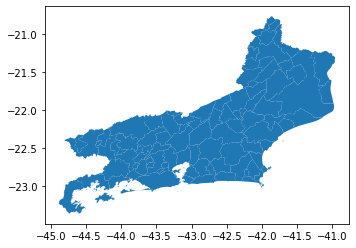

In [ ]:
rj.plot()

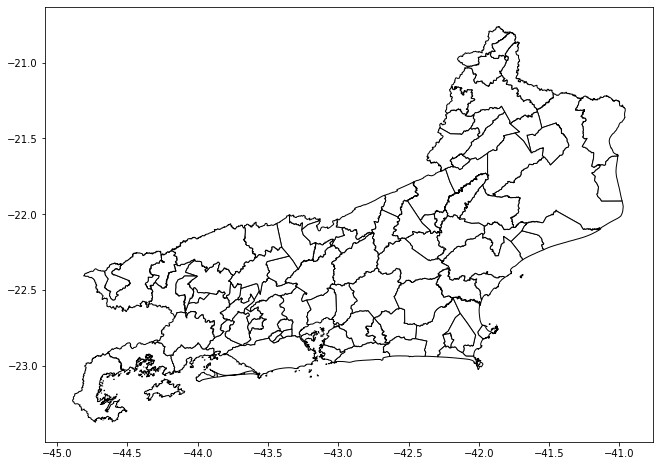

In [ ]:
rj.plot(color='white',edgecolor='black',figsize=(15,8))

# Criando poligonos

In [ ]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

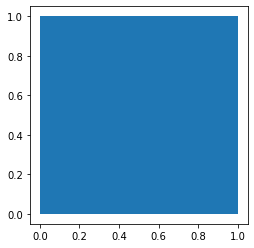

In [ ]:
# criar um quadrado
p1=Polygon([(0,0),(1,0),(1,1),(0,1)])
# criar geo series
g=gpd.GeoSeries(p1)
g.plot()

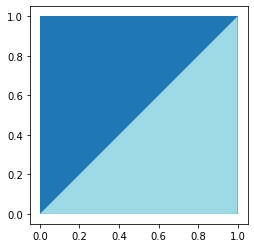

In [ ]:
# criar um triangulo
p2=Polygon([(0,0),(1,0),(1,1)])
g=gpd.GeoSeries([p1,p2])
g.plot(cmap='tab20')
# veja que o quadrado esta atras e o triangulo na frente dele


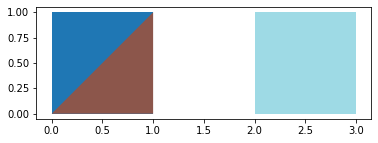

In [ ]:
p1 = Polygon([(0, 0),(1, 0),(1, 1),(0, 1)])
p2 = Polygon([(0, 0),(1, 0),(1, 1)])
# criar um outro quadrado mais afastado
p3 = Polygon([(2, 0),(3, 0),(3, 1),(2, 1)])
g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap="tab20")

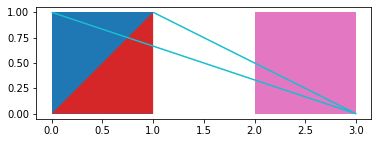

In [ ]:
p1 = Polygon([(0, 0),(1, 0),(1, 1),(0, 1)])
p2 = Polygon([(0, 0),(1, 0),(1, 1)])
p3 = Polygon([(2, 0),(3, 0),(3, 1),(2, 1)])
p4=LineString([(0,1),(3,0),(1,1)])
g = gpd.GeoSeries([p1, p2, p3,p4])
g.plot(cmap="tab10")

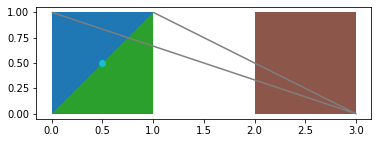

In [ ]:
p1 = Polygon([(0, 0),(1, 0),(1, 1),(0, 1)])
p2 = Polygon([(0, 0),(1, 0),(1, 1)])
p3 = Polygon([(2, 0),(3, 0),(3, 1),(2, 1)])
p4=LineString([(0,1),(3,0),(1,1)])
p5=Point(0.5,0.5)
g = gpd.GeoSeries([p1, p2, p3,p4,p5])
g.plot(cmap="tab10")

In [ ]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
dtype: geometry

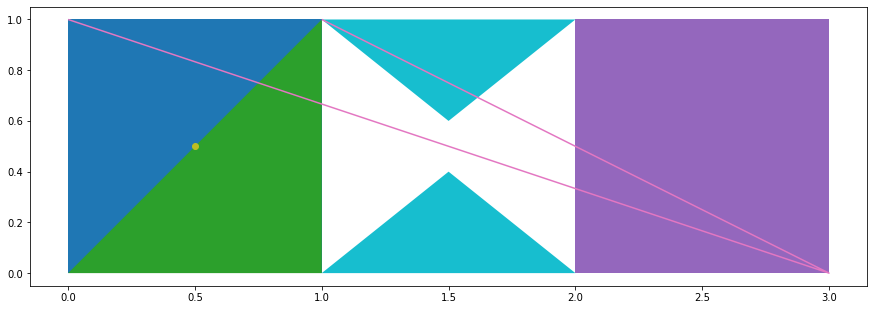

In [ ]:
p1 = Polygon([(0, 0),(1, 0),(1, 1),(0, 1)])
p2 = Polygon([(0, 0),(1, 0),(1, 1)])
p3 = Polygon([(2, 0),(3, 0),(3, 1),(2, 1)])
p4=LineString([(0,1),(3,0),(1,1)])
p5=Point(0.5,0.5)
p6=Polygon([(1, 0),(1.5, 0.4),(2, 0)])
p7=Polygon([(1, 1),(1.5, 0.6),(2, 1)])
p8= MultiPolygon([p6,p7])
g = gpd.GeoSeries([p1, p2, p3,p4,p5,p8])
g.plot(cmap="tab10", figsize=(15,8))

In [ ]:
# esses polygons podem representar um municipio, rio, etc
# veja que em rj cada municipio é relacionado a um polygon
rj.head() 

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


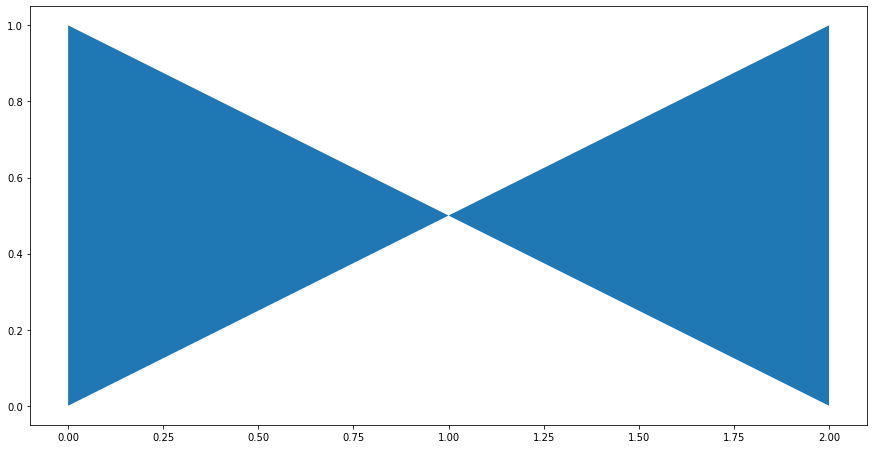

In [ ]:
# exemplos
p11 = Polygon([(0, 0), (2, 1), (2, 0), (0, 1)])

g = gpd.GeoSeries([p11])
g.plot(cmap='tab10', figsize=(15,8))

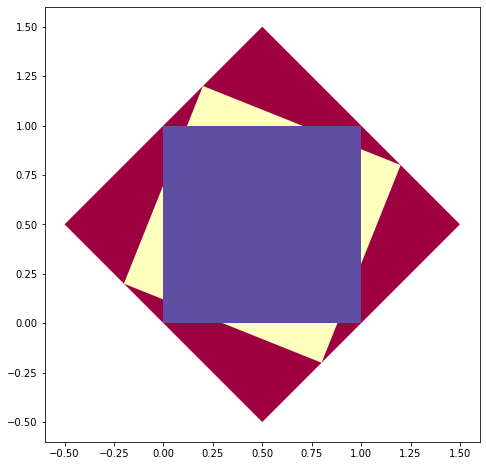

In [ ]:
figuras = []
for i in [0.5, 0.2, 0]:
    figuras.append(Polygon([(0 - i, 0 + i),
                            (1 - i, 0 - i),
                            (1 + i, 1 - i),
                            (0 + i, 1 + i)]))

g = gpd.GeoSeries(figuras)
g.plot(cmap='Spectral', figsize=(15,8))

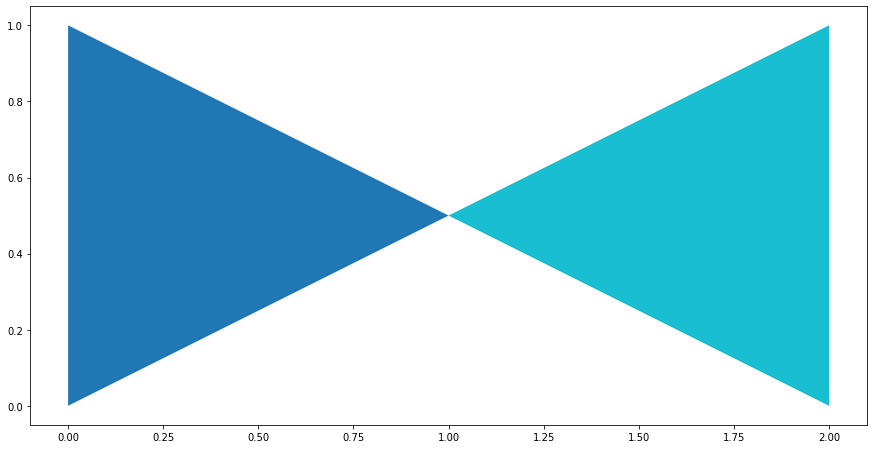

In [ ]:
p11 = Polygon([(0, 0), (1, 0.5), (0, 1)])
p12 = Polygon([(2, 0), (1, 0.5), (2, 1)])

g = gpd.GeoSeries([p11, p12])
g.plot(cmap='tab10', figsize=(15,8))

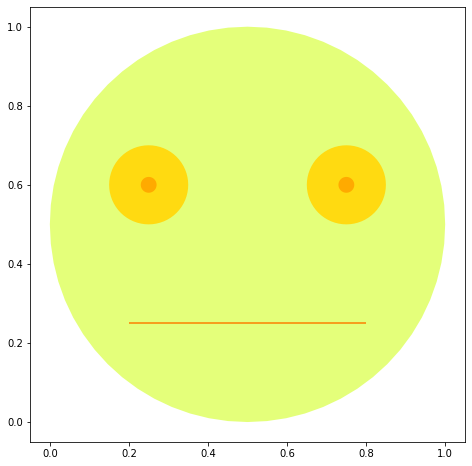

In [ ]:
p10 = Point(0.5, 0.5).buffer(0.5)
p20 = MultiPolygon([Point(0.25, 0.6).buffer(0.1), 
                    Point(0.75, 0.6).buffer(0.1)])
p30 = MultiPolygon([Point(0.25, 0.6).buffer(0.02),
                    Point(0.75, 0.6).buffer(0.02)])
p40 = LineString([(0.2, 0.25), (0.8, 0.25)])

g = gpd.GeoSeries([p10, p20, p30, p40])
g.plot(cmap='Wistia', figsize=(15,8))

A função buffer(), do objeto Point(), pode ser utilizada para gerar um círculo com raio especificado pelo seu parâmetro distance:

### Entendendo e criando shape files

Nesse ponto, a ideia é entendermos um pouco mais o shapefile - um formato de arquivo que contém dados geoespaciais em formato de vetor, muito utilizado por sistemas de informações geográficas (SIG ou, em inglês, GIS). Ele foi criado e regulamentado pela ESRI, uma empresa americana especialista no desenvolvimento de produtos para essa área de estudo.

Os shapefiles representam geometrias, como pontos, polígonos e linhas - exatamente os objetos que trabalhamos na aula anterior, e que podem representar municípios, estados, continentes, relevos, rios, entre outras informações, e que podem conter atributos que os defines (nomes, valores, etc.).

Apesar de nos referirmos ao shapefile de maneira singular, ele consiste em uma distribuição de arquivos que contêm o mesmo nome e ficam armazenados no mesmo diretório, mas que possuem extensões diferentes. Algumas delas são obrigatórias, como .shp (o arquivo shapefile de imagem propriamente dito), .shx (uma indexação dos formatos dentro do arquivo) e .dbf (que armazena os atributos desses formatos).

Exemplos de arquivos que podem ser distribuídos juntamente com o shapefile são o .cpg (arquivo de codificação de caracteres) e o .prj (que contém as informações relacionadas a um sistema de coordenadas), e sua presença varia dependendo do software que está sendo utilizado. Essas duas extensões estão presentes nos arquivos do nosso projeto.

Logo, o formato shapefile é formado por um conjunto de arquivos que têm o mesmo nome e extensões diferentes. Estes arquivos ficam armazenados em um mesmo diretório e alguns deles são obrigatórios para assegurar o correto funcionamento.

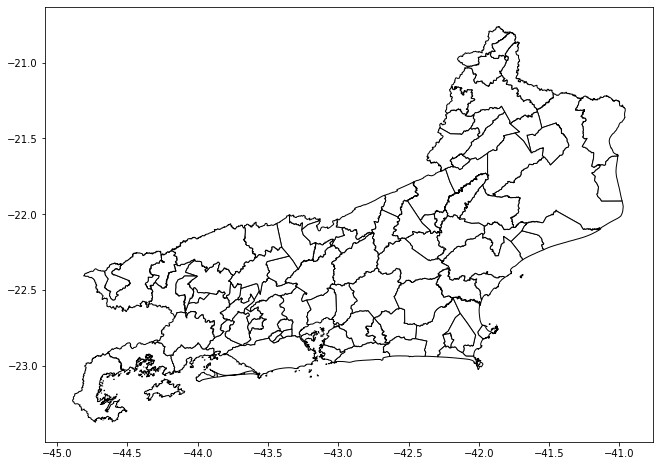

In [ ]:
# preciso ler os arquivos shp, shx e dbf
# estado do RJ
rj.plot(color='white',edgecolor='black', figsize=(15,8))

Modificar meu dataframe

In [ ]:
rj.head()
# meu DataFrame

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


In [ ]:
# vamos trabalhar so com a cidade do RJ
# ou seja vou selecionar uma linha no meu DataFrame
rj=rj[rj['NM_MUNICIP']=='RIO DE JANEIRO']
rj
# agora meu DataFrame so tem a cidade do RJ e nao o Estado RJ

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


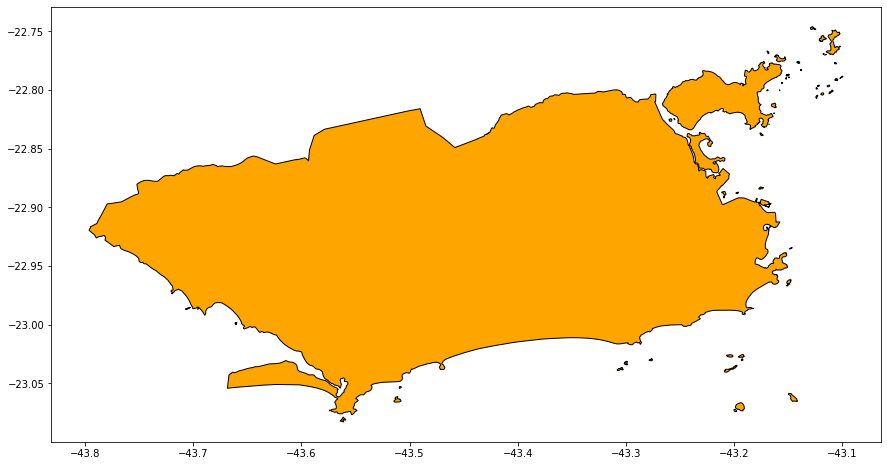

In [ ]:
rj.plot(color='orange',edgecolor='black', figsize=(15,8))
# somente o municipio do RJ

Salvando: de um shape file criamos um contendo so a cidade do RJ e agora vamos salvar isso em separado

In [ ]:
import os


dir = '../01.Dados/Mapas/RJ-MUNIC'
if not os.path.exists(dir): 
    os.makedirs(dir)

In [ ]:
rj.to_file(dir + '/RJ-MUNIC.shp')
# salvou o arquivo RJ-MUN.cpg

In [ ]:
rj_munic=gpd.read_file(dir + '/RJ-MUNIC.shp')

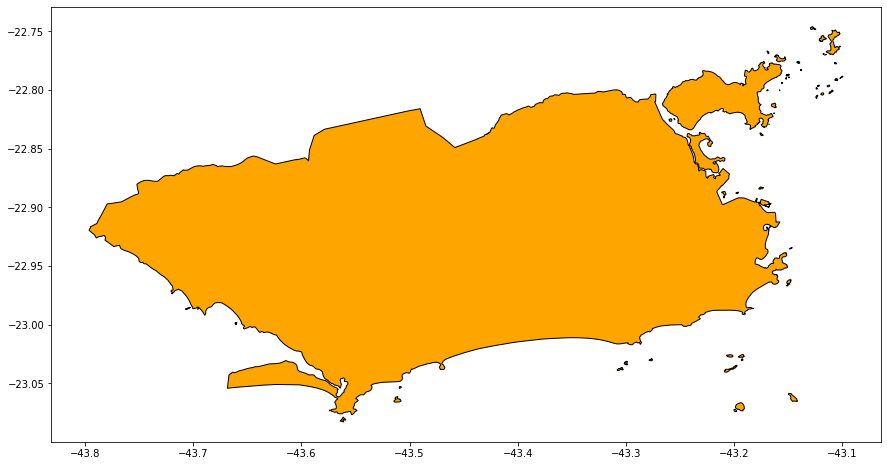

In [ ]:
rj_munic.plot(color='orange',edgecolor='black', figsize=(15,8))
# o mesmo resultado

Agora, vamos abordar localizações, além de conhecermos o dataset que trabalharemos ao longo do curso.

Localizações representam pontos na superfície da terra, e a forma mais simples de representá-las é por meio de coordenadas, compostas por latitude e longitude

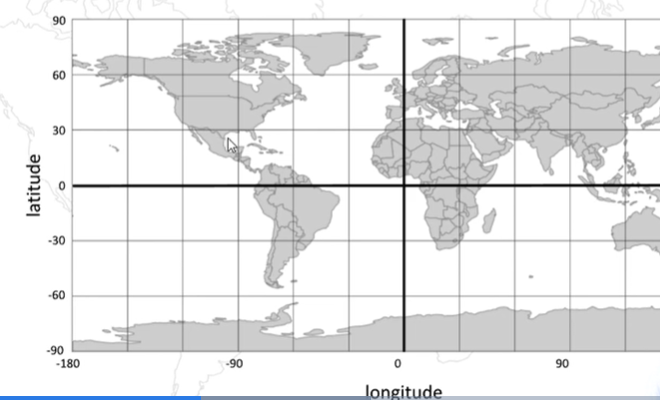

Lembre-se que as coordenadas são sempre P = (longitude, latitude).

# Transformando DataFrame em GeoDataFrame

Upload o doc dados aqui, dentro da pasta Dados

In [ ]:
dados=pd.read_table('/01.Dados/dados.txt')
# se voce abrir o txt vc vera como o arquivo esta separado (com tab)
dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


In [ ]:
type(dados)
# o dados é um dataFrame. Vamos a seguir transformar em GeoDatFrame

pandas.core.frame.DataFrame

Como eu consigo transformar uma base de dados com endereço e CEP em uma base de latitude e longitude?

Esse processo pode ser um pouco trabalhoso. As soluções que encontrei utilizam uma API do Google. Esse post é bem completo e explica como a API funciona:

https://www.monolitonimbus.com.br/como-converter-endereco-em-latitude-e-longitude/

Também encontrei essa funcão criada por usuário do github que parece fazer o serviço, mas vai precisar testar. Precisa ter o Python e o R instalados na sua máquina. https://github.com/th1460/CEP2COO

In [ ]:
from shapely.geometry import Point

In [ ]:
x=zip(dados.Longitude, dados. Latitude)
x

In [ ]:
list(x)

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.477504700000004, -23.0189271),
 (-43.247108700000005, -22.933574899999996),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.922570899999997),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982000000002),
 (-43.1849587, -22.970644399999998),
 (-43.354812100000004, -23.0097423),
 (-49.0606445, -26.922570899999997),
 (-43.3461644, -22.938107000000002),
 (-43.181953799999995, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.280851500000004, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.019108300000003),
 (-43.45904960000001, -23.023215),
 (-43.233903399999996, -22.9936095),
 (-43.1987716, -22.985367999999998),
 (-43.230810600000005, -22.9771863),
 (-43.2525968, -22.926766600000004),
 (-51.92528, -14.235004),
 (-43.18529320

In [ ]:
geometry=[Point(x) for x in zip(dados.Longitude, dados. Latitude)]

In [ ]:
geometry

 ...]

In [ ]:
# criar o geoDataFrame
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
# vamos entender crs a seguir
geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

In [ ]:
geo_dados
# mesmo que antes mas agora temos a coluna geometry

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [ ]:
type(geo_dados)
# veja que agora temos um geoDataFrame

geopandas.geodataframe.GeoDataFrame

In [ ]:
# salvando: criando a folder
import os

dir = '../01.Dados/Mapas/RJ-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)

In [ ]:
# adicionando o geoDataFrame para a pasta vazia
geo_dados.to_file(dir + '/DATASET.shp')

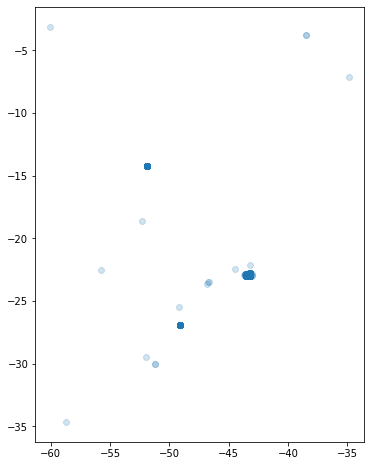

In [ ]:
geo_dados.plot(figsize=(15,8), alpha=0.2)
# pontos representam os imoveis dentro do Rj

O CRS (ou "sistema de referência de coordenadas") é uma forma padronizada de escrever as localizações no globo terrestre. Existe mais de um CRS, e sua escolha depende de um conjunto de fatores, como a abrangência geográfica ou mesmo em que época os dados foram coletados. Quando queremos comparar conjuntos de dados com CRSs diferentes, é importante estabelecer um CRS em comum entre eles para torná-los comparáveis - e aprenderemos a fazer isso no futuro.

Existem três parâmetros que, geralmente, aparecem na maioria das configurações de CRS

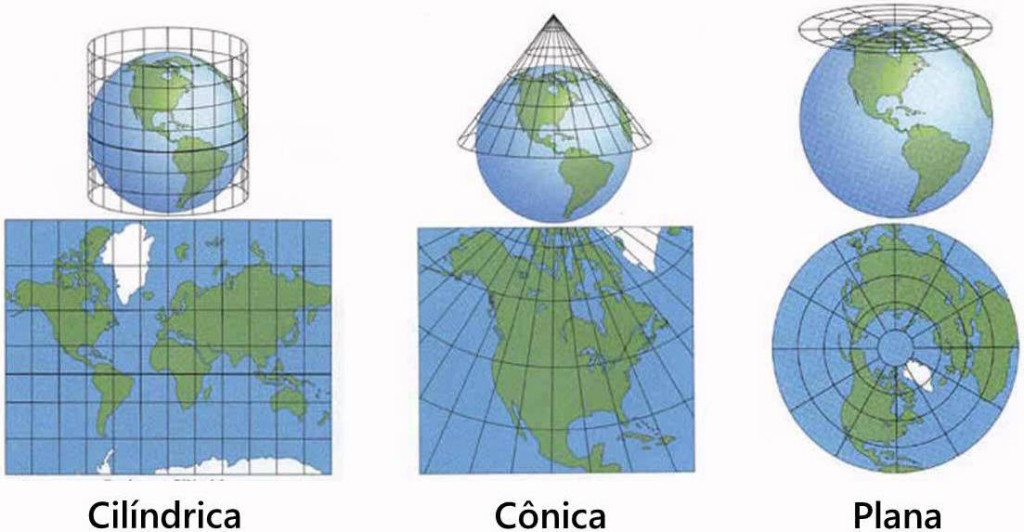

Sobre o sistema de referência de coordenadas, julgue os itens abaixo:

A Terra não é uma esfera perfeita. Ela é levemente achatada nos polos e, portanto, o modelo que melhor descreve a forma básica da Terra é uma elipse;
O datum fornece as informações necessárias para ancorar as coordenadas abstratas na Terra. O datum define o ponto de origem dos eixos coordenados e define a direção dos eixos;
Gerar uma representação bidimensional do globo terrestre é um processo conhecido como projeção.

Para diminuir as distorções, a projeção UTM divide a Terra em sessenta zonas e cria uma projeção diferente em cada zona.

VER WORD PARA ENTENDER MAIS

In [ ]:
import geopandas as gpd
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [ ]:
# ver o crs
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_dados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# vamos colaca-los com o mesmo crs
# Brasil é sirgas 2000 e temos que escolher a zona que o RJ esta
# EPSG 31983


https://www.spatialreference.org/ref/epsg/31983/proj4/

In [ ]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
# UNITS mudamos de m para km
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
# salvo meus novos arquivos
rj.to_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [ ]:
rj2 = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados2 = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [ ]:
rj2
# agora esta tudo em km

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [ ]:
rj2.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Conforme mencionado em nosso treinamento, quando combinamos datasets com diferentes CRS, é importante transformá-los para um CRS comum, para que se alinhem um com o outro. Os formatos apresentados são maneiras corretas de se definir um CRS:

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'
O formato Proj4 String é uma forma válida.

'+init=epsg:4326'
O formato Proj4 String, utilizando códigos EPSG, é uma forma válida.

{'ellps': 'GRS80', 'no_defs': True, 'proj': 'utm', 'south': True, 'units': 'km', 'zone': 23}
 Os CRS também podem ser representados no formato de dicionário.


Exemplos:

geo_df = geo_df.to_crs({'init': 'epsg:4326'})

geo_df.to_crs({'init': 'epsg:4326'}, inplace = True)

 É possível utilizar o parâmetro inplace, do método to_crs(), para modificar o CRS de um GeoDataFrame sem precisar sobrescrevê-lo.


# Selecionando pontos dentro de uma região

In [ ]:
# como fazer graficos em camadas
# base: municipio do RJ
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
# camada 1: localizacao dos imoveis
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')


Para plotar as informações de mais de um shapefile em camadas, é preciso converter o CRS de cada shapefile para um CRS comum;

In [ ]:
# verificar o crs
rj.crs
geo_dados.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

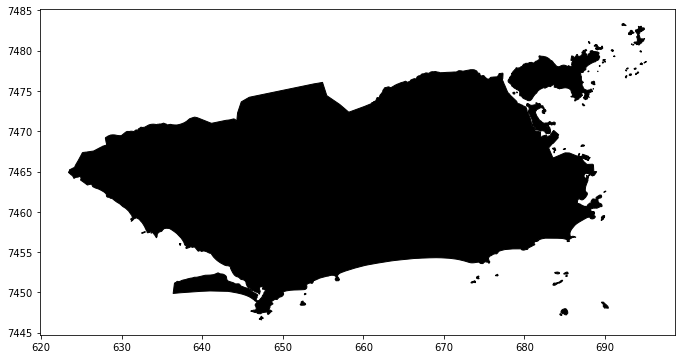

In [ ]:
# Municipio RJ
base = rj.plot(color='black', edgecolor='black', figsize=(13,6))
base

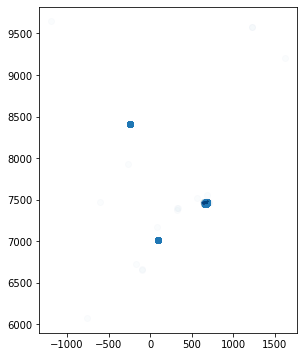

In [ ]:
base = rj.plot(color='black', edgecolor='black', figsize=(13,6))
geo_dados.plot(ax=base,figsize=(13,6), alpha=0.02)
# se voce ver de perto o municipio em preto esta atras dos pontos mais escuros, 
# mesmo com um alpha (transparencia) de 0.02, assim os pontos espalhados no 
# grafico mostram que estao fora do municipio do RJ

In [ ]:
# temos que match os pontos e o municipio 
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [ ]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 0, dtype: object

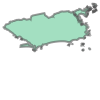

In [ ]:
rj.iloc[0].geometry

In [ ]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

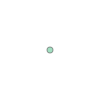

In [ ]:
geo_dados.iloc[0].geometry

In [ ]:
# quero saber se esse pontota localizado na geometry do rj
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)
# esse codico responde a pergunta: esse ponto anterior esta dentro de rj?

True

In [ ]:
# alternativamente
# esse ponto esta contido nesse caso
# agora a pergunta ao contrario questionando se a região rj.iloc[0] contém 
# o ponto geo_dados.iloc[0]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [ ]:
# agora fazer para todos os pontos
geo_dados['geometry'].within(rj.iloc[0].geometry)
# para cada ponto vai fazer essa pergunta e resposta

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [ ]:
geo_dados['geometry'].within(rj.iloc[0].geometry).head(12)
# vamos ver os 12 primeiros. existem 3 falsos

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
dtype: bool

In [ ]:
geo_dados.head(12)
# veja o 4 por exemplo

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
6,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,POINT (679.746 7462.762)
7,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,POINT (685.278 7457.298)
8,119,Barra da Tijuca,Rio de Janeiro,Península Fit,RJ,-14.235004,-51.925280,3,2,2,Apartamento,Venda,1130000,POINT (-248.715 8415.117)
9,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,POINT (687.096 7462.359)


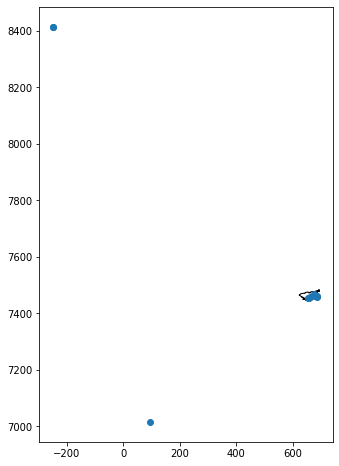

In [ ]:
# vamos ver uma amostra disso
amostra = geo_dados.iloc[:12] 
# essa amostra pega os 12 primeiros booleand T/F, dos quais 3 sao falsos, ou seja
# fora do municipio do RJ
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
amostra.plot(ax=base, figsize=(15,8), alpha=1)


In [ ]:
# vamos fazer isso para todos, filtrando so os true
antes=geo_dados.shape[0]
antes
# 5000 pontos

5000

In [ ]:
geo_dados=geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]
# filtrando

In [ ]:
depois=geo_dados.shape[0]
depois

4513

In [ ]:
antes-depois
# ou seja 487 registros estavam fora do municipio do rj

487

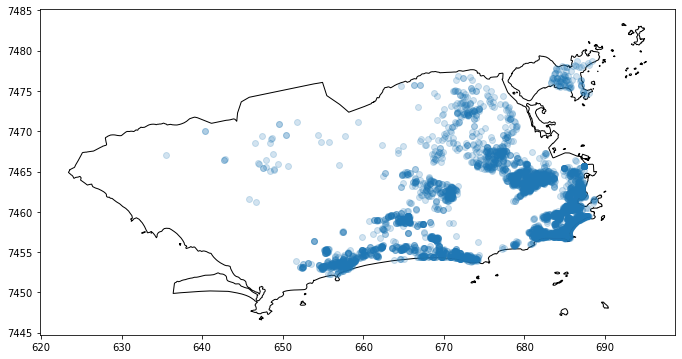

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(13,6))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.2)

In [ ]:
# salvar meus geoDados
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

Exercicio

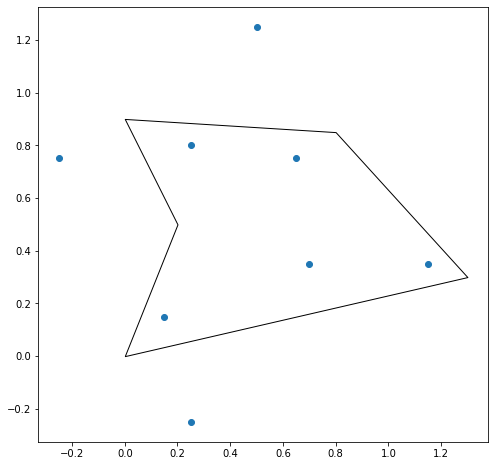

In [ ]:
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

polygon = Polygon([(0, 0), (1.3, 0.3), (0.8, 0.85), 
                    (0, 0.9), (0.2, 0.5)])

points = [Point(0.65, 0.75), Point(0.25, 0.8),
            Point(0.7, 0.35), Point(0.15, 0.15),
            Point(1.15, 0.35), Point(-0.25, 0.75),
            Point(0.25, -0.25), Point(0.5, 1.25)]

polygon = gpd.GeoSeries(polygon)
points = gpd.GeoSeries(points)

base = polygon.plot(color='white', 
                    edgecolor='black', 
                    figsize=(15, 8))

points.plot(ax=base)

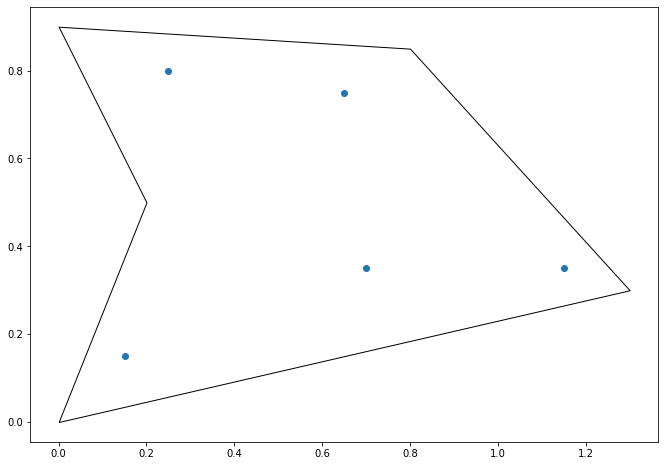

In [ ]:
# selecionar so os pontos dentro
points = points[points.within(polygon.iloc[0])]
base = polygon.plot(color='white',
                    edgecolor='black',
                    figsize=(15, 8))
points.plot(ax=base)

/usr/local/lib/python3.7/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


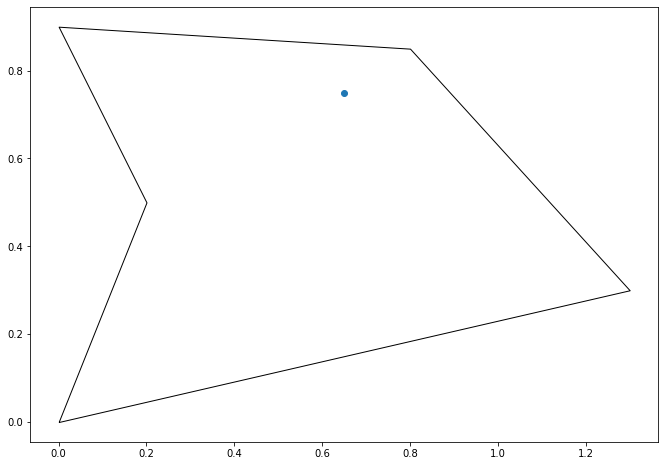

In [ ]:

points = points[points.within(polygon)]
base = polygon.plot(color='white',
                    edgecolor='black',
                    figsize=(15, 8))
points.plot(ax=base)

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:402: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


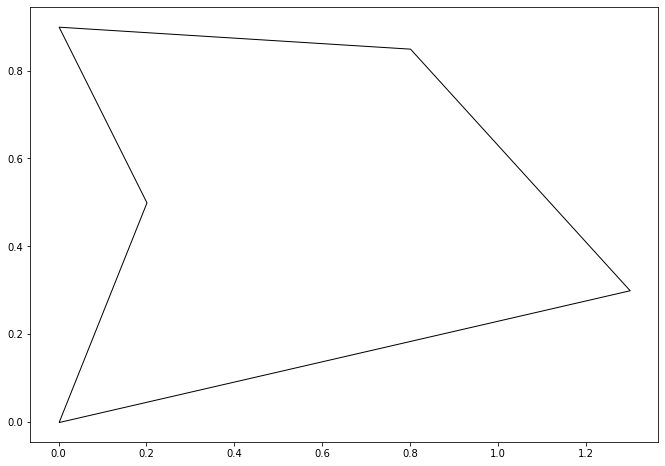

In [ ]:

points = points[~points.within(polygon.iloc[0])]
base = polygon.plot(color='white',
                    edgecolor='black',
                    figsize=(15, 8))
points.plot(ax=base)

Ao longo dos vídeos, o instrutor irá utilizar o arquivo Estações_Metrô.geojson, necessário para o decorrer desta aula e do treinamento.

# Distancia até a Estação de Metrô mais perto

fonte de dados: https://www.data.rio/
Quero as estacoes de metro: https://www.data.rio/datasets/7a0b22723c5a458faaae79f046163504_19

Donwlod o arquivo em https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson



Upload esse arquivo

In [ ]:
metro=gpd.read_file('/Estações_Metrô.geojson')
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,None,0,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [ ]:
# para usar esse frame com o resto preciso modificar o crs desse cara
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# mudar crs para o mesmo que usamos anteriormente
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
# veja que lat e long tao em km e nao mais em m
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,None,0,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


In [ ]:
# juntar tudo agora
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

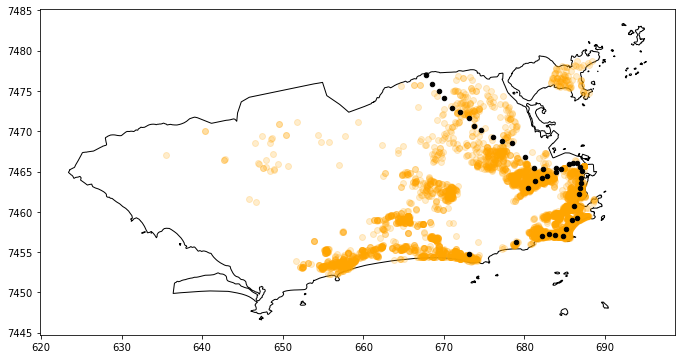

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(13,6))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 20)
# marksize muda o tamanho da bola
#plotei geo_dados na minha base rj e o metro na minha base tb

Aprendemos até agora que, para iniciar o trabalho com um novo conjunto de dados, alguns procedimentos iniciais são necessários (abrir o arquivo, verificar o CRS, modificar o CRS, plotar os dados, etc).

Com a projeção UTM, é possível definir em que unidade de medida queremos a representação das informações. Quando configuramos o CRS de uma projeção UTM, é possível determinar a unidade de medida da representação de nossos dados. Isso é definido através do parâmetro units.

In [ ]:
# quero ver(as menores) distancia dos pontos para as estacoes de metro
# pegar um ponto para testarmos
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

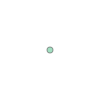

In [ ]:
geo_dados.iloc[0].geometry
# meu ponto

In [ ]:
# quero ver distancia desse ponto para as estacoes de metro
distance=metro.distance(geo_dados.iloc[0].geometry)
distance
# ou seja distancia desse ponto para as 41 estacoes do metro

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [ ]:
# quero a menor distancia em km
distance.min()

15.62293882499506

In [ ]:
# criar uma variavel que ve essa distancia para todos os pontos
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())
geo_dados
# veja que a var Dist foi criada

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248


In [ ]:
# vamos ver a correlacao entre distancia e valor
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [ ]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])
coef
# ou seja quanto maior a distancia menor sera o valor do imovel, o que parece razoavel

-0.19564083161686793

In [ ]:
# salvando
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

Vamos adicionar mais camadas de transportes

Os outros conjuntos de dados com que trabalharemos também deverão ser extraídos do site Data.Rio, e podem ser encontrados pesquisados pelos termos relacionados ("BRT" e "trem", respectivamente). Para faciliarmos esse trabalho, separamos os links diretos para esses arquivos a seguir:

dataset "Estações_BRT"
dataset "Estações_Trem"

In [ ]:
# adicionar o BRT em files
# add o BRT aqui
trem=gpd.read_file('/Estações_Trem.geojson')
trem.head()

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,Flg_Ativa,Status,Flg_BelfordRoxo,Flg_Saracuruna,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.44939 -22.76073)
1,2,20,Comendador Soares,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.48895 -22.74415)
2,3,4,Austin,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.52271 -22.72031)
3,4,81,Queimados,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.55610 -22.71624)
4,5,29,Engenheiro Pedreira,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.60606 -22.67875)


In [ ]:
# deixar o msm crs
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

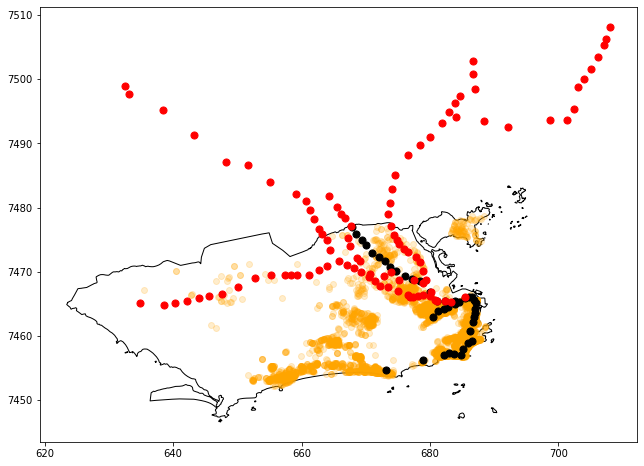

In [ ]:
# plotar
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

In [ ]:
# quero so os pontos dentro da cidade do RJ
trem = trem[trem.within(rj.iloc[0].geometry)]

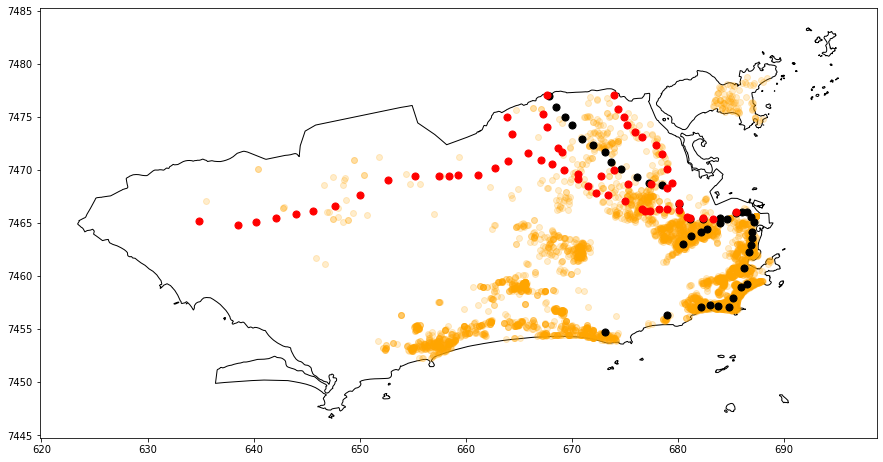

In [ ]:
# plotar
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

In [ ]:
brt=gpd.read_file('/Estações_BRT.geojson')
# importando
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
# mudar crs

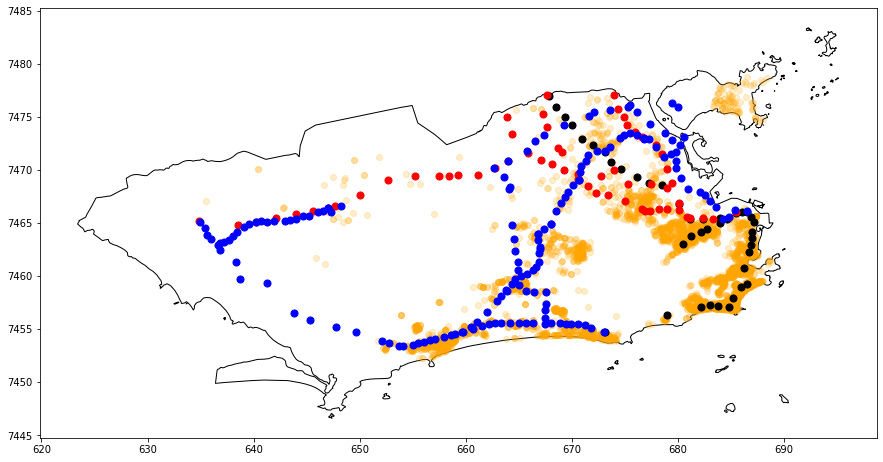

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
brt.plot(ax=base, color='blue', markersize= 50)

In [ ]:
# para calcular a distancia eu preciso colocar todos no mesmo geoDataframe
# eu to interessado nesse caso so nas geometrias
# entao vou concatenar (preciso do pandas para isso)
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index = True)
# ignore_index = True significa que ele cria um novo index para esse novo GeoDataSeries

In [ ]:
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [ ]:
type(transporte)
# é uma geoSeries pq eu tenho so geometriy
# poderia ter criado um GeoDataframe e classificar os tipos de trem, brt, metro

geopandas.geoseries.GeoSeries

In [ ]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())
# x é so um valor arbitrario que podemos usar outro nome
# agora ta pegando a distancia min ate o mais proximo estacao de transporte
# veja que tem dist_metro e dist_transporte

In [ ]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831,2.129366
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134,0.563492
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.180300
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248,1.871081


In [ ]:
geo_dados.corr()
# correlacao: veja Valor vs Dist_Metro e Dist_Transp

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [ ]:
# salvando
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


Adicionar vegetacao
https://www.data.rio/datasets/a22768dc645043f5bdfd1affab888ded_0

In [ ]:
praias=gpd.read_file('/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp') 

In [ ]:
praias

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
0,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,8684.890625,441.128326,19870,Outros,Corpos d’água continentais,,,8684.889153,"POLYGON ((-43.56601 -23.06277, -43.56611 -23.0..."
1,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,2209.344727,241.436403,19871,Outros,Corpos d’água continentais,,,2209.343321,"POLYGON ((-43.59625 -23.04796, -43.59634 -23.0..."
2,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17015.344727,468.728882,19872,Outros,Corpos d’água continentais,,,17015.344086,"POLYGON ((-43.59737 -23.04845, -43.59754 -23.0..."
3,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17597.541016,916.463204,19873,Outros,Corpos d’água continentais,,,17597.540796,"POLYGON ((-43.60808 -23.04336, -43.60823 -23.0..."
4,Vg,2016-01-01T00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.875977,605.329142,19874,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,"POLYGON ((-43.56995 -23.05858, -43.57013 -23.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9934,V2s,2016-01-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",121300.632324,2914.467452,29804,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,121300.629955,"POLYGON ((-43.55900 -23.06448, -43.55901 -23.0..."
9935,V2s,2016-01-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",76260.648926,2681.657808,29805,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,76260.650001,"POLYGON ((-43.55901 -23.06891, -43.55871 -23.0..."
9936,V2s,2016-01-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",8171.828125,388.221884,29806,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,8171.826153,"POLYGON ((-43.56432 -23.06963, -43.56445 -23.0..."
9937,V2s,2016-01-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",34221.484375,949.728601,29807,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,34221.485938,"POLYGON ((-43.55524 -23.07054, -43.55513 -23.0..."


In [ ]:
# vamos usar a variavel legenda
# primeiro precisamos mudar crs
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

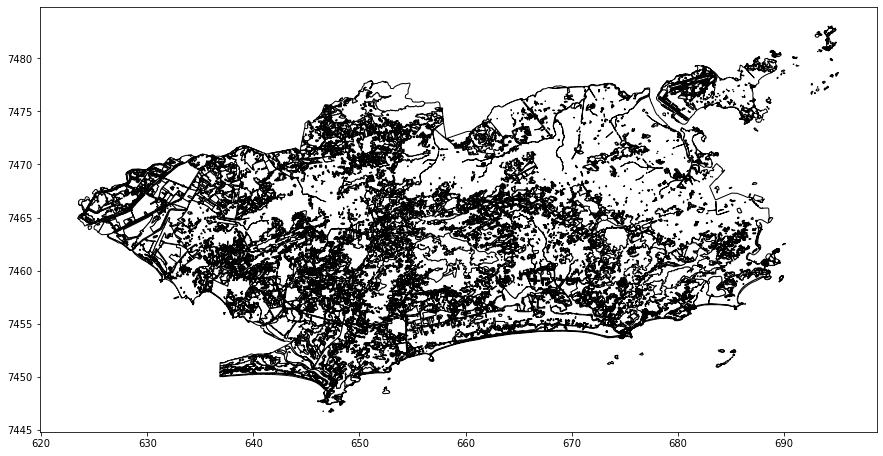

In [ ]:
praias.plot(color='white', edgecolor='black', figsize=(15,8))

In [ ]:
# quero verificar onde estao as praias
praias['legenda'].value_counts()
# mostra uma lista dos meus tipos de vegetacao
# queremos 'Praia'

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [ ]:
praias = praias[praias['legenda'] == 'Praia']

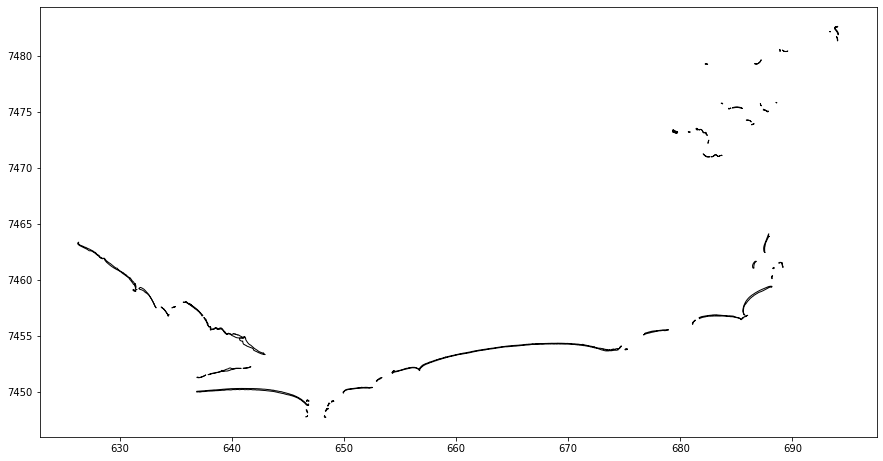

In [ ]:
# veja que sobrou so a praia
praias.plot(color='white', edgecolor='black', figsize=(15,8))

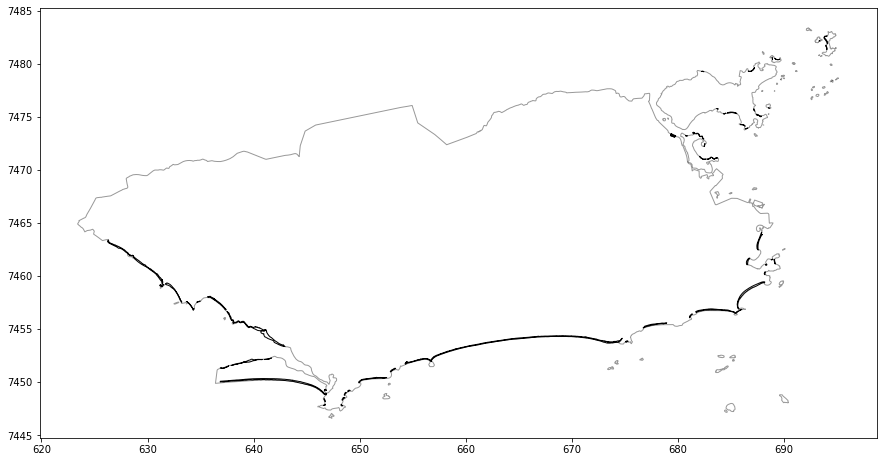

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8), alpha=0.4)
# coloco o alpha para nao confundir
praias.plot(ax=base, color='white', edgecolor='black')

In [ ]:
# agora vamos calcular os pontos dos imoveis, geo_dados, ate as praia
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [ ]:
geo_dados
# veja que agora tenho a Dist_Praia
# Lembra que na outra aula tava Dist_Transporte e agora Dit_Trans, isso ocorre pois ha limite de tamanho da minha var

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Dist_Trans,geometry,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,0.443193,POINT (657.514 7453.832),1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,3.642787,POINT (670.524 7461.803),7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,0.641470,POINT (674.345 7469.440),6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,0.422370,POINT (662.701 7457.284),3.404589
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,0.214605,POINT (656.019 7453.574),1.369015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,2.129366,POINT (648.664 7469.216),16.133493
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,0.563492,POINT (655.010 7452.944),0.955964
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,2.180300,POINT (683.909 7459.848),2.612550
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,1.871081,POINT (678.393 7464.417),7.679812


In [ ]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Trans,Dist_Praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361519
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187805
Dist_Trans,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230641
Dist_Praia,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,0.187805,0.230641,1.000000


In [ ]:
# salvando
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

# Exercicio

Utilizando o conjunto com os dados de localização das estações de metrô obtidas no portal DataRio (utilizadas no último vídeo), identifique as quatro estações de metrô mais próximas e as quatro estações de metrô mais distantes dos quatro pontos abaixo:

Latitude	Longitude
-22.9531	-43.1884
-23.0278	-43.4665
-22.8463	-43.3007
-22.8969	-43.3165
Informe também as distâncias em quilômetros do ponto até as estações mais próximas e mais distantes.

Dicas para solução:

Crie um DataFrame com os dados acima;

Transforme o DataFrame em um GeoDataFrame, criando a coluna geometry. Utilize o seguinte CRS para criar o GeoDataFrame: {'init': 'epsg:4326'};

Transforme os CRS dos dois arquivos, utilizando a projeção UTM com o parâmetro units em quilômetros;

Obtenha os nomes das estações (utilize os métodos idxmin() e idxmax()) e as respectivas distâncias mínima e máxima (utilize os métodos min() e max()).

Os métodos min() e max() retornam o valor mínimo e máximo de uma determinada coluna de um DataFrame ou GeoDataFrame, já os métodos idxmin() e idxmax() retornam os índices (index) das linhas onde os valores mínimo e máximo, de determinada coluna, estão localizados. Por exemplo, considere o seguinte DataFrame dados:

Nomes	Notas
A	20
B	40
C	10
D	30


In [ ]:
# Importando bibliotecas
from shapely.geometry import Point

# Obtendo os dados do Metrô
metro1=gpd.read_file('/Estações_Metrô.geojson')

# Criando o DataFrame com os dados do problema
pontos = {'Latitude': [-22.9531, -23.0278, -22.8463, -22.8969],
            'Longitude': [-43.1884, -43.4665, -43.3007, -43.3165]}
dados1 = pd.DataFrame(pontos)

# Convertendo o DataFrame em um GeoDataFrame
geometry = [Point(x) for x in zip(dados1.Longitude, dados1.Latitude)]
crs = {'init': 'epsg:4326'}
geo_dados1 = gpd.GeoDataFrame(dados1, crs = crs, geometry = geometry)

# Modificando o CRS dos GeoDataFrames
geo_dados1 = geo_dado1.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro1 = metro1.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Criando as colunas com as respostas
geo_dados1['Metro_Perto'] = geo_dados1['geometry'].apply(lambda x: metro1['Nome'].iloc[metro1.distance(x).idxmin()])
geo_dados1['Dist_Min'] = geo_dados1['geometry'].apply(lambda x: "{0:.2f} km".format(metro1.distance(x).min()))
geo_dados1['Metro_Longe'] = geo_dados1['geometry'].apply(lambda x: metro1['Nome'].iloc[metro1.distance(x).idxmax()])
geo_dados1['Dist_Max'] = geo_dados1['geometry'].apply(lambda x: "{0:.2f} km".format(metro1.distance(x).max()))

# Exibindo a solução do problema
geo_dados1[['Metro_Perto', 'Dist_Min', 'Metro_Longe', 'Dist_Max']]

Exercicio:

In [ ]:
from shapely.geometry import Point, Polygon

Square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])

Point_A = Point(1.1, 1.1)
Point_B = Point(0.5, 0.5)

points = gpd.GeoDataFrame(geometry=[ Point_A, Point_B], index=['A', 'B'])
polygon = gpd.GeoDataFrame(geometry=[Square], index=['P'])

base = polygon.plot(color='white', edgecolor='red', figsize=(15,8))
points.plot(ax=base, markersize=150)
# point B é o do meio e A o de fora

In [ ]:
points.loc['B'].geometry.within(polygon.iloc[0].geometry)

In [ ]:
polygon.iloc[0].geometry.contains(points.loc['A'].geometry)

In [ ]:
points.distance(points.loc['A'].geometry).iloc[0]

In [ ]:
points.distance(points.loc['B'].geometry).loc['B']

In [ ]:
polygon['geometry'].apply(lambda x: points.distance(x))['B'].iloc[0]

 Fique sempre atento para o usos dos seletores loc e iloc. O primeiro trabalha com labels e o segundo com índices numéricos de posição.

Exercicio: A função concat() da biblioteca pandas é uma forma eficiente de se concatenar DataFrames e GeoDataFrames. Existem outras formas de se obter o mesmo resultado, utilizando métodos diferentes da biblioteca.

In [ ]:
# considere os DataFrames
import pandas as pd

A = pd.DataFrame([1, 2], columns=['A'])
B = pd.DataFrame([3, 4], columns=['A'])
C = pd.DataFrame([5, 6], columns=['A'])

	A

0	1

1	2

2	3

3	4

4	5

5	6


In [ ]:
A.append([B, C], ignore_index=True)

In [ ]:
A.merge(B, how='outer').merge(C, how='outer')

In [ ]:
pd.concat([A, B, C], ignore_index=True)

In [ ]:
pd.concat([A, B, C], sort=True)

Exercicio: 

No último vídeo, obtivemos as menores distâncias dos imóveis anunciados até a praia (orla). Diferente das distâncias calculadas anteriormente, neste caso calculamos as distâncias de um ponto até um polígono (orla). O método utilizado é o mesmo, só que agora os lados do polígono são considerados para o cálculo das distâncias.

O que faremos neste exercício é medir distâncias entre polígonos. Este cálculo é feito da mesma forma empregada no último vídeo e vai servir para fixarmos o emprego desta técnica.

Considere o código inicial abaixo. O GeoDataFrame estado_rj possui informações de todos os municípios do estado do Rio de Janeiro (shapefile que utilizamos no início de nosso curso):

indique qual o município mais distante do município do Rio de Janeiro e qual a distância em quilômetros. Lembrando que as distâncias obtidas com essa técnica são em linha reta.

In [ ]:
import geopandas as gpd

estado_rj = gpd.read_file('/01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
estado_rj = estado_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

rj1 = estado_rj[estado_rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

rj1['Munic_Longe'] = rj1['geometry'].apply(lambda x: estado_rj['NM_MUNICIP'].iloc[ estado_rj.distance(x).idxmax() ])
rj1['Dist_Max'] = rj1['geometry'].apply(lambda x: "{0:.2f} km".format(estado_rj.distance(x).max()))

rj1[['Munic_Longe', 'Dist_Max']]
# errado deveria ser VARRE-SAI 233.23KM

#Haveria alguma ferramenta (lib) onde eu coloco o endereço completo e obtenho a latitude / longitude?

Para isso você pode utilizar a biblioteca geopy (https://pypi.org/project/geopy/). Essa biblioteca, receberá um endereço e a partir desse endereço retornará- a latitude e longitude. A geopy utiliza o serviço de localização Nominatim (https://nominatim.openstreetmap.org/ui/search.html)que é uma ferramenta de busca por nome e endereço (geocodificação) e este serviço funciona por trás do OpenStreetMap, um serviço similar ao Google Maps, porém, utilizando o Nominatim conseguiremos utilizar o serviço gratuitamente e sem problemas de autenticação de usuário, diferentemente do Google Maps, que te limitará a um número de solicitações gratuitas e solicitará diversos passos para conseguir uma chave de acesso a API do Google Maps.



Primeiro precisamos instalar essa biblioteca. Abra o terminal na pasta do seu projeto, ative o ambiente virtual se houver e digite:

In [ ]:
pip install geopy

Agora, veja como fica o código para retornar as coordenadas do endeço da sede da Nubank: R. Capote Valente, 39 - Pinheiros, São Paulo - SP, 05409-000.

In [ ]:
>>> from geopy.geocoders import Nominatim
>>> geolocator = Nominatim(user_agent="geolocalização")
>>> location = geolocator.geocode("R. Capote Valente, 39 - Pinheiros, São Paulo - SP, 05409-000")

>>> print((location.latitude, location.longitude))
>>> (-23.5524219, -46.6788067)

Mas e se eu quiser encontrar a latitude e longitude apenas pelo CEP sem utilizar o endereço completo?

Agora que já conhecemos como a biblioteca geopy funciona, iremos utilizar outra biblioteca para nos retornar o endereço através do CEP:
https://pypi.org/project/pycep-correios/

In [ ]:
pip install pycep-correios

In [ ]:
>>> import pycep_correios

>>> # R. Capote Valente, 39 - Pinheiros, São Paulo - SP, 05409-000
>>> endereco = pycep_correios.get_address_from_cep('05409000')

>>> print(endereco)
>>> {'bairro': 'Pinheiros', 'cep': '05409-000', 'cidade': 'São Paulo', 'logradouro': 'Rua Capote Valente', 'uf': 'SP', 'complemento': ''}

Observe que é nos retornado um dicionário com as informações do endereço daquele CEP. Sabendo disso, agora podemos aliar as duas bibliotecas, a geopy e a pycep-correios. Veja como fica:

In [ ]:
from geopy.geocoders import Nominatim
import pycep_correios

# R. Capote Valente, Pinheiros - São Paulo
endereco = pycep_correios.get_address_from_cep('05409000')

geolocator = Nominatim(user_agent="geolocalização") # coloque o nome do seu projeto em "user_agent"
print(f"{endereco['logradouro'][0]}., {endereco['bairro']} - {endereco['cidade']}")

# Formato: R.  Capote Valente
rua = f"{endereco['logradouro'][0]}. {endereco['logradouro'][3:]}"
# Pinheiros
bairro = endereco['bairro']
# São Paulo
cidade = endereco['cidade']

localizacao = geolocator.geocode(f"{rua}, {bairro}-{cidade}")

print((localizacao.latitude, localizacao.longitude))

OBS: Geralmente em cidades pequenas o CEP não retorna bairro e nem rua, pois é apenas um CEP para a cidade toda. E para esses casos podemos buscar a latitude e longitude apenas pelo endereço da cidade. Veja como fica as alterações:

In [ ]:
from geopy.geocoders import Nominatim
import pycep_correios

# São Sebastião do Rio Preto - MG
endereco = pycep_correios.get_address_from_cep('35815000')

geolocator = Nominatim(user_agent="geolocalização")

rua = endereco['logradouro']
bairro = endereco['bairro']
cidade = endereco['cidade']

if rua and bairro:
    rua = f"{rua[0]}. {rua[3:]}"
    localizacao = geolocator.geocode(f"{rua}, {bairro}-{cidade}")
else:
    localizacao = geolocator.geocode(f"{cidade}")

print((localizacao.latitude, localizacao.longitude))